In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fifa23_cleaned.csv')

In [3]:
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6


In [4]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [5]:
data = data[needed_columns]

In [6]:
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6


#Split the data into two parts

In [7]:
X = data.drop(['BestPosition', 'Nationality', 'ID'], axis = 1)
Y = pd.DataFrame(data['BestPosition'])



In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [9]:
X_train = X_train.drop(['Name'], axis = 1)
test_names = X_test['Name']
X_test = X_test.drop(['Name'], axis = 1)





In [10]:
top = data.sort_values(by = 'Overall', ascending = False).head(20)

In [11]:
top_pos = top['BestPosition']
top_names = top['Name']
top = top.drop(['Name', 'BestPosition', 'Nationality', 'ID'], axis = 1)


In [12]:
top.head()

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,Club,ValueEUR,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,35,169,67,91,91,0,2190,452,453,54000000,...,75,96,20,35,24,6,11,15,14,8
2,33,185,81,91,91,0,2205,458,230,84000000,...,90,88,35,42,19,15,6,12,8,10
3,31,181,70,91,91,0,2303,483,399,107500000,...,83,89,68,65,53,15,13,5,10,13
4,23,182,73,91,95,4,2177,470,453,190500000,...,80,88,26,34,32,13,5,7,11,6
1,34,185,81,91,91,0,2147,455,494,64000000,...,84,90,43,24,18,13,11,5,5,7


#Handle the imbalance dataset

<Axes: xlabel='BestPosition', ylabel='count'>

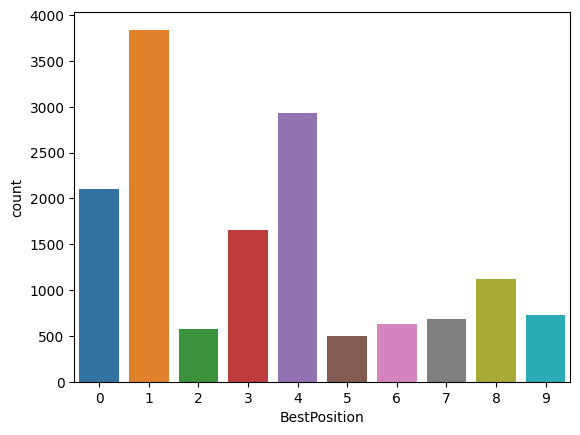

In [13]:
sns.countplot(x = 'BestPosition', data = Y_train)

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
oversample = RandomOverSampler(sampling_strategy = 'minority')

In [16]:
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

<Axes: xlabel='BestPosition', ylabel='count'>

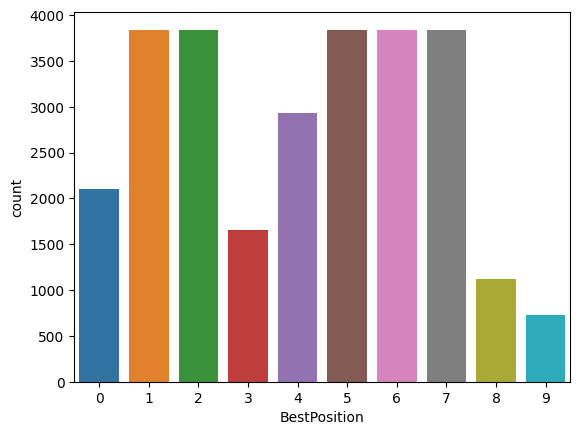

In [17]:
sns.countplot(x = 'BestPosition', data = Y_train)

#Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X_train= mms.fit_transform(X_train)
X_test= mms.fit_transform(X_test)

top = mms.fit_transform(top)

In [19]:
X_train.shape

(27732, 61)

In [20]:
X_train

array([[0.32142857, 0.54901961, 0.37254902, ..., 0.04395604, 0.06741573,
        0.09090909],
       [0.14285714, 0.35294118, 0.45098039, ..., 0.06593407, 0.07865169,
        0.11363636],
       [0.21428571, 0.29411765, 0.31372549, ..., 0.07692308, 0.14606742,
        0.07954545],
       ...,
       [0.17857143, 0.66666667, 0.39215686, ..., 0.13186813, 0.14606742,
        0.07954545],
       [0.5       , 0.49019608, 0.29411765, ..., 0.12087912, 0.08988764,
        0.13636364],
       [0.17857143, 0.58823529, 0.43137255, ..., 0.08791209, 0.03370787,
        0.14772727]])

#Modeling

##Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
Y_pred_lr = lr.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
confusion_matrix(Y_test, Y_pred_lr)

array([[462,   8,  14,   0,   0,   4,  28,   1,   5,   0],
       [ 17, 706,  29,   0,  64,   6,  84,  19,  32,   5],
       [  3,   3,  90,   0,   4,   2,  19,   0,   2,   9],
       [  0,   0,   0, 391,   0,   0,   0,   0,   0,   0],
       [  1,   9,   5,   0, 677,   0,   0,  15,   0,   4],
       [  2,   3,  19,   0,   0,  22,  23,  44,   3,   0],
       [  3,   4,  24,   0,   0,  15, 111,  10,   1,   0],
       [  0,   1,   4,   0,   5,  15,   3, 147,   0,   3],
       [  9,  34, 100,   0,   0,   4,  57,   0, 109,   0],
       [  0,   1, 129,   0,  12,   1,   0,   6,   2,  46]])

In [27]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       522
           1       0.92      0.73      0.82       962
           2       0.22      0.68      0.33       132
           3       1.00      1.00      1.00       391
           4       0.89      0.95      0.92       711
           5       0.32      0.19      0.24       116
           6       0.34      0.66      0.45       168
           7       0.61      0.83      0.70       178
           8       0.71      0.35      0.47       313
           9       0.69      0.23      0.35       197

    accuracy                           0.75      3690
   macro avg       0.66      0.65      0.62      3690
weighted avg       0.81      0.75      0.76      3690



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 50)

In [30]:
rf.fit(X_train, Y_train)

<ipython-input-30-d0055dbae671>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [31]:
Y_pred_rf = rf.predict(X_test)

In [32]:
confusion_matrix(Y_test, Y_pred_rf)

array([[484,   9,   4,   0,   0,   3,  11,   0,  11,   0],
       [ 25, 810,   4,   0,  41,   3,  22,  12,  42,   3],
       [ 12,  21,  42,   0,   1,   2,   8,   1,  11,  34],
       [  0,   0,   0, 391,   0,   0,   0,   0,   0,   0],
       [  0,  20,   3,   0, 678,   0,   0,   9,   0,   1],
       [  4,  11,  12,   0,   0,  18,  12,  46,  10,   3],
       [ 14,  26,  11,   0,   0,   8,  80,  11,  16,   2],
       [  0,   2,   2,   0,   9,  14,   1, 144,   0,   6],
       [ 22,  69,  15,   0,   0,   4,  17,   0, 175,  11],
       [  0,  12,  32,   0,  24,   0,   0,   2,   3, 124]])

In [33]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       522
           1       0.83      0.84      0.83       962
           2       0.34      0.32      0.33       132
           3       1.00      1.00      1.00       391
           4       0.90      0.95      0.93       711
           5       0.35      0.16      0.21       116
           6       0.53      0.48      0.50       168
           7       0.64      0.81      0.71       178
           8       0.65      0.56      0.60       313
           9       0.67      0.63      0.65       197

    accuracy                           0.80      3690
   macro avg       0.68      0.67      0.67      3690
weighted avg       0.79      0.80      0.79      3690



In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(max_features = 39, max_depth = 10)

In [36]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [37]:
Y_pred_dt = dt.predict(X_test)

In [38]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       522
           1       0.80      0.65      0.71       962
           2       0.19      0.62      0.29       132
           3       1.00      1.00      1.00       391
           4       0.90      0.78      0.83       711
           5       0.14      0.41      0.21       116
           6       0.33      0.56      0.42       168
           7       0.46      0.50      0.48       178
           8       0.50      0.33      0.40       313
           9       0.39      0.08      0.13       197

    accuracy                           0.64      3690
   macro avg       0.56      0.56      0.52      3690
weighted avg       0.73      0.64      0.66      3690



In [39]:
from sklearn.svm import SVC

In [40]:
svc =  SVC()

In [41]:
svc.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [42]:
Y_pred_svc = svc.predict(X_test)

In [43]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       522
           1       0.92      0.77      0.84       962
           2       0.23      0.77      0.35       132
           3       1.00      1.00      1.00       391
           4       0.93      0.94      0.94       711
           5       0.37      0.49      0.42       116
           6       0.42      0.69      0.52       168
           7       0.68      0.72      0.70       178
           8       0.75      0.44      0.55       313
           9       0.78      0.11      0.19       197

    accuracy                           0.77      3690
   macro avg       0.70      0.68      0.64      3690
weighted avg       0.83      0.77      0.77      3690



#Ensemble Methods

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ada = AdaBoostClassifier()

In [46]:
ada.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [47]:
Y_pred_adadt = ada.predict(X_test)

In [48]:
print(classification_report(Y_test, Y_pred_adadt))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       522
           1       0.74      0.40      0.52       962
           2       0.10      0.09      0.09       132
           3       1.00      1.00      1.00       391
           4       0.77      0.79      0.78       711
           5       0.14      0.07      0.09       116
           6       0.18      0.54      0.26       168
           7       0.23      0.88      0.36       178
           8       0.51      0.16      0.25       313
           9       0.42      0.11      0.18       197

    accuracy                           0.57      3690
   macro avg       0.49      0.48      0.43      3690
weighted avg       0.66      0.57      0.57      3690



In [49]:
ada_lr = AdaBoostClassifier(LogisticRegression())

In [50]:
ada_lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=LogisticRegression())

In [51]:
Y_pred_adalr = ada_lr.predict(X_test)

In [52]:
print(classification_report(Y_test, Y_pred_adalr))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66       522
           1       0.73      0.56      0.63       962
           2       0.11      0.80      0.19       132
           3       1.00      1.00      1.00       391
           4       0.96      0.72      0.82       711
           5       0.15      0.31      0.20       116
           6       0.24      0.35      0.29       168
           7       0.41      0.66      0.50       178
           8       0.00      0.00      0.00       313
           9       0.00      0.00      0.00       197

    accuracy                           0.55      3690
   macro avg       0.46      0.49      0.43      3690
weighted avg       0.66      0.55      0.57      3690



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=10)

In [55]:
knn.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [56]:
Y_pred_knn = knn.predict(X_test)

In [57]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       522
           1       0.79      0.56      0.66       962
           2       0.15      0.60      0.24       132
           3       1.00      1.00      1.00       391
           4       0.92      0.83      0.87       711
           5       0.16      0.41      0.23       116
           6       0.24      0.46      0.32       168
           7       0.41      0.56      0.47       178
           8       0.71      0.21      0.33       313
           9       0.64      0.14      0.23       197

    accuracy                           0.63      3690
   macro avg       0.59      0.55      0.52      3690
weighted avg       0.75      0.63      0.65      3690



In [65]:
mapping = {'CF':0, 'CM':1, 'RW':2, 'GK':3, 'CB':4, 'LW':5, 'LM': 6, 'LB':7, 'RM':8, 'RB': 9}

In [69]:
top = pd.DataFrame(top)
for i in range(top.shape[0]):#M Salah
  pred_pos = rf.predict(top.iloc[[i]])[0] #index  = 1

  pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]#1 changes to CM
  true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]#2 changes to RW

  print('Name: {} \nPredictions: {} \nTrue Position: {} \n'.format(top_names.iloc[i], pred, true_pos))



Name: L. Messi 
Predictions: CM 
True Position: CM 

Name: R. Lewandowski 
Predictions: CF 
True Position: CF 

Name: K. De Bruyne 
Predictions: CM 
True Position: CM 

Name: K. Mbappé 
Predictions: CF 
True Position: CF 

Name: K. Benzema 
Predictions: CF 
True Position: CF 

Name: M. Salah 
Predictions: CM 
True Position: RW 

Name: T. Courtois 
Predictions: GK 
True Position: GK 

Name: M. Neuer 
Predictions: GK 
True Position: GK 

Name: Cristiano Ronaldo 
Predictions: CF 
True Position: CF 

Name: V. van Dijk 
Predictions: CB 
True Position: CB 

Name: S. Mané 
Predictions: RW 
True Position: LM 

Name: N. Kanté 
Predictions: CM 
True Position: CM 

Name: J. Kimmich 
Predictions: CM 
True Position: CM 

Name: Ederson 
Predictions: GK 
True Position: GK 

Name: Alisson 
Predictions: GK 
True Position: GK 

Name: J. Oblak 
Predictions: GK 
True Position: GK 

Name: Casemiro 
Predictions: CB 
True Position: CM 

Name: H. Son 
Predictions: RW 
True Position: LW 

Name: H. Kane 
Predic

In [68]:
list(mapping.keys())[list(mapping.values()).index(pred_pos)]

TypeError: ignored